In [1]:
# standard import
import pandas as pd
import numpy as np

# sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# miscilaneous models
import openml
from ucimlrepo import fetch_ucirepo
import os

# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
def process_data(X, y, cat_feat, num_feat):
    # one-hot encode categorical features
    X_processed = pd.get_dummies(X, columns=cat_feat, drop_first=True, dtype=int)

    # save categorical features after one-hot encoding
    cat_feat_dummy = X_processed.drop(columns=num_feat).columns.to_numpy()

    # get feature importance
    # random forest
    imp_model_rf = RandomForestRegressor(
        min_samples_leaf=5, max_features=0.33, n_estimators=100, random_state=777
    )
    feat_imp_rf = imp_model_rf.fit(X_processed, y).feature_importances_

    imp_df = pd.DataFrame(
        {
            "feature": X_processed.columns,
            "importance_rf": feat_imp_rf,
        }
    ).sort_values("importance_rf", ascending=False)

    X_binned = X_processed[num_feat].apply(
        lambda c: pd.qcut(c, q=4, duplicates="drop"), axis=0
    )
    X_binned = pd.concat([X_binned, X_processed[cat_feat_dummy]], axis=1)

    subgroup_dict = {
        "num_feat": num_feat,
        "cat_feat": cat_feat_dummy,
        "importance": imp_df,
        "binned_df": X_binned,
    }

    return X_processed, y, subgroup_dict

In [3]:
data = "data_parkinsons"
# fetch dataset
parkinsons_telemonitoring = fetch_ucirepo(id=189)

X_orig = parkinsons_telemonitoring.data.features.drop(columns="test_time")
y = parkinsons_telemonitoring.data.targets.total_UPDRS.to_numpy()

# save categorical and numerical features
cat_feat_parkinsons = ["sex"]
num_feat_parkinsons = X_orig.drop(columns=cat_feat_parkinsons).columns.to_numpy()

X, y, subgroups = process_data(X_orig, y, cat_feat_parkinsons, num_feat_parkinsons)
bin_df = subgroups["binned_df"]

In [4]:
sorted_idx = X['sex_1'].argsort()

In [5]:
X.iloc[sorted_idx]

,age,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex_1
0,72,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
3321,60,0.00320,0.000027,0.00147,0.00183,0.00442,0.02717,0.240,0.01237,0.01533,0.02188,0.03712,0.013382,20.837,0.44109,0.72622,0.15063,0
3322,60,0.00736,0.000056,0.00383,0.00333,0.01150,0.04174,0.363,0.02219,0.02660,0.02967,0.06657,0.039739,15.802,0.53779,0.77603,0.26447,0
3323,60,0.00436,0.000038,0.00183,0.00224,0.00548,0.03468,0.305,0.01868,0.02035,0.02672,0.05605,0.021484,17.573,0.56131,0.75547,0.21999,0
3324,60,0.00502,0.000040,0.00218,0.00253,0.00654,0.02345,0.216,0.01101,0.01469,0.02055,0.03302,0.014082,21.474,0.52062,0.73551,0.19993,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,66,0.00470,0.000016,0.00261,0.00232,0.00782,0.02894,0.256,0.01606,0.01676,0.02043,0.04818,0.020676,19.349,0.49848,0.53687,0.25316,1
4507,66,0.00727,0.000028,0.00351,0.00294,0.01054,0.03587,0.320,0.01870,0.02109,0.02576,0.05610,0.029694,17.723,0.55605,0.55642,0.25455,1
4506,66,0.00715,0.000024,0.00409,0.00329,0.01228,0.04840,0.499,0.02759,0.02798,0.03582,0.08278,0.040506,15.990,0.57865,0.53150,0.22302,1
4519,66,0.00549,0.000019,0.00278,0.00232,0.00835,0.04437,0.404,0.02547,0.02359,0.03164,0.07640,0.028470,17.224,0.57329,0.52423,0.25990,1


In [21]:
X[X['sex_1']==0]["DFA"]

0       0.54842
1       0.56477
2       0.54405
3       0.57794
4       0.56122
         ...   
5870    0.55314
5871    0.56518
5872    0.57888
5873    0.56327
5874    0.57077
Name: DFA, Length: 4008, dtype: float64

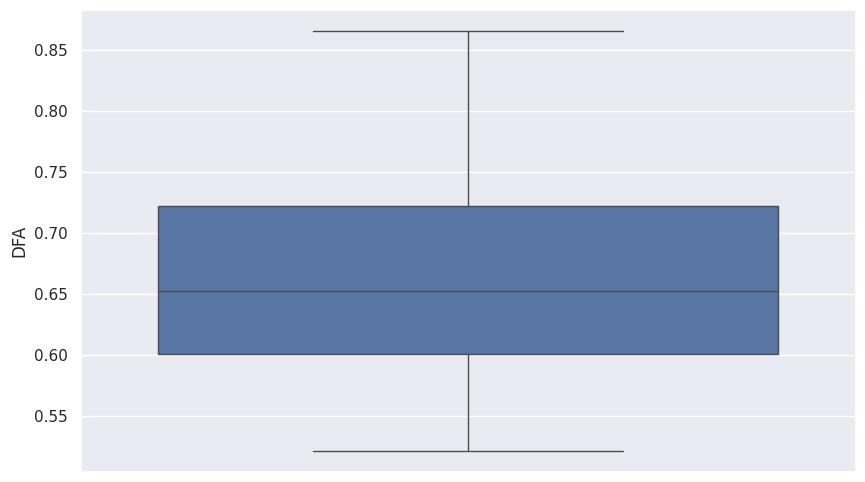

In [23]:
# boxplot DFA for each gender
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(X[X['sex_1']==0]["DFA"])
plt.show()

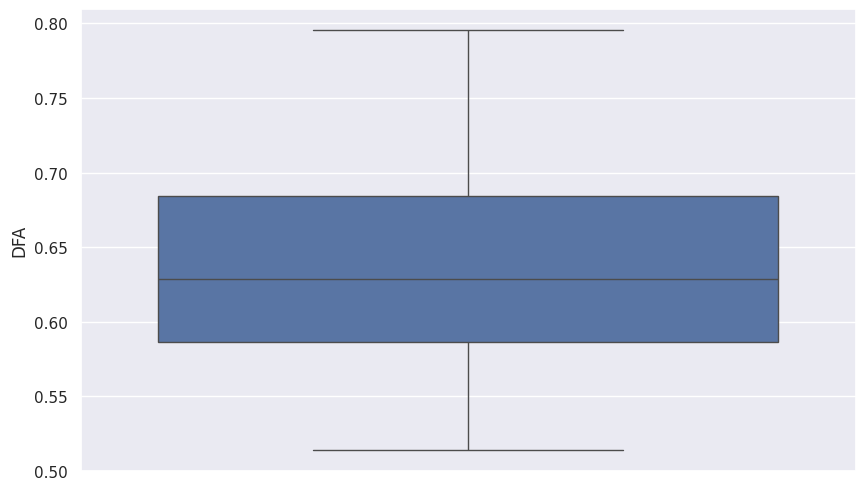

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(X[X['sex_1']==1]["DFA"])
plt.show()

In [6]:
# read in feature importances
base_dir = "lfi-values/fulldata/rf/"
lotla_values = {}
shap_values = {}
lime_values = {}
women_count = {}
for seed in range(5):
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    sorted_idx = X_test['sex_1'].argsort()
    women_count[seed] = np.bincount(X_test['sex_1'])[0]
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons/elastic_nonnormed_nosquared_rank.csv", delimiter=",")[sorted_idx]
    shap_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons/shap.csv", delimiter=",")[sorted_idx]
    lime_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons/lime.csv", delimiter=",")[sorted_idx]

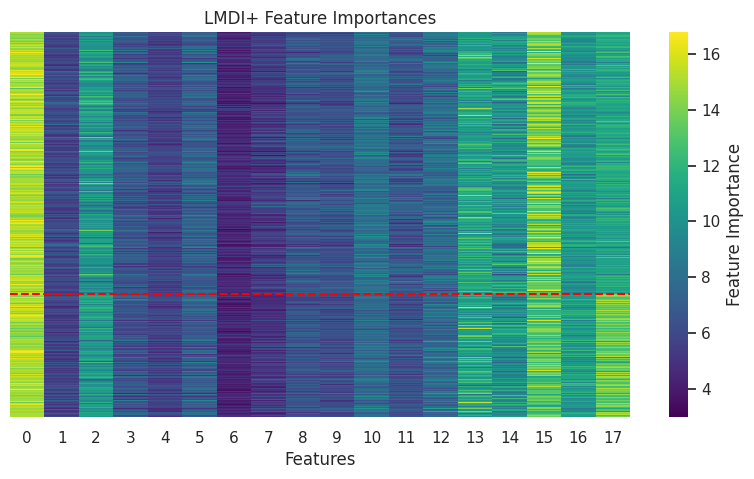

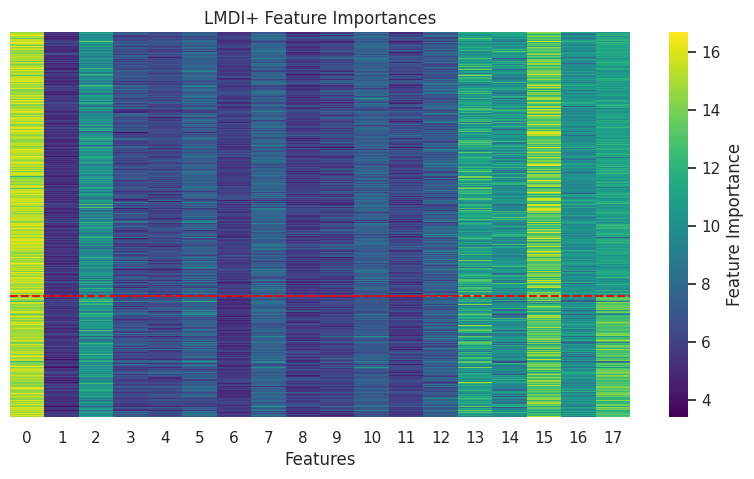

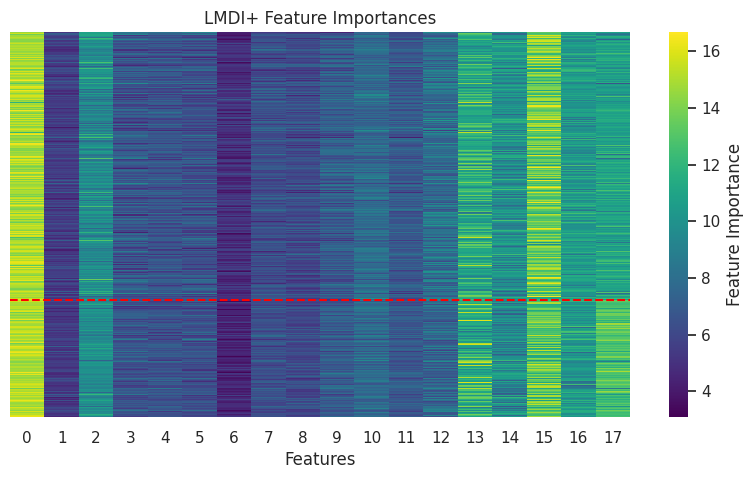

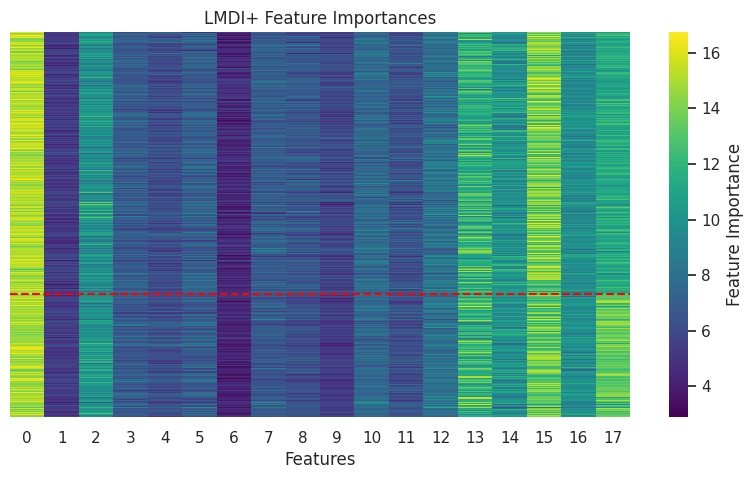

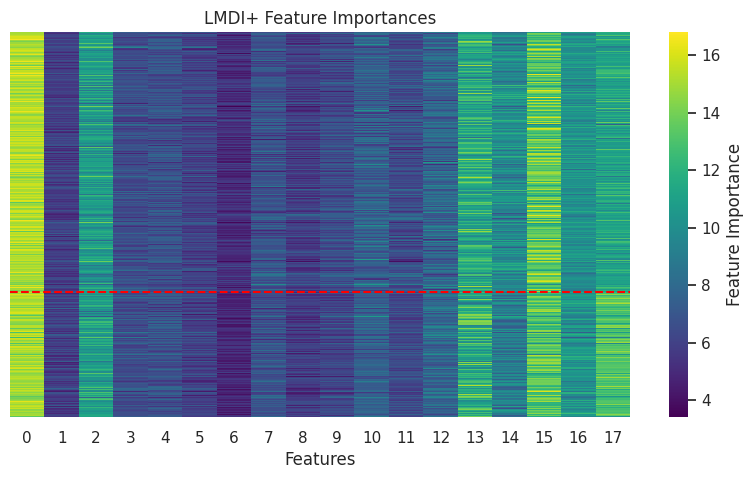

In [7]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(lotla_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LMDI+ Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()

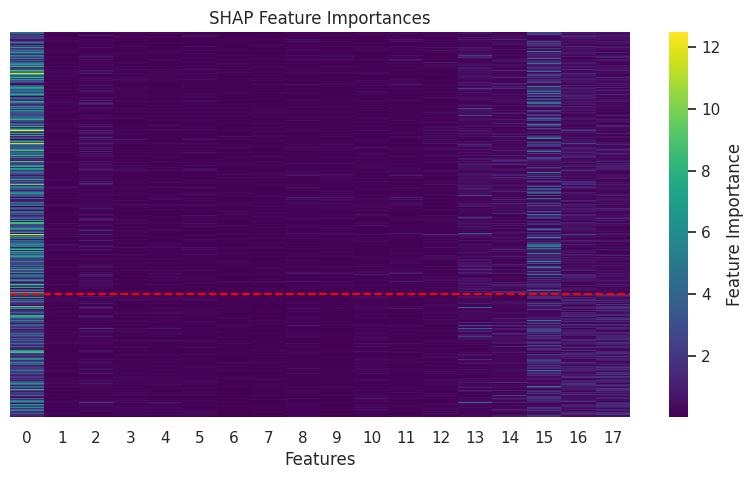

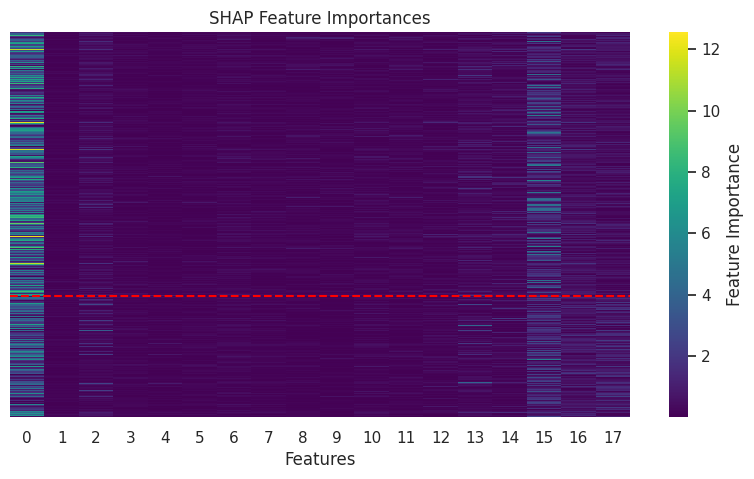

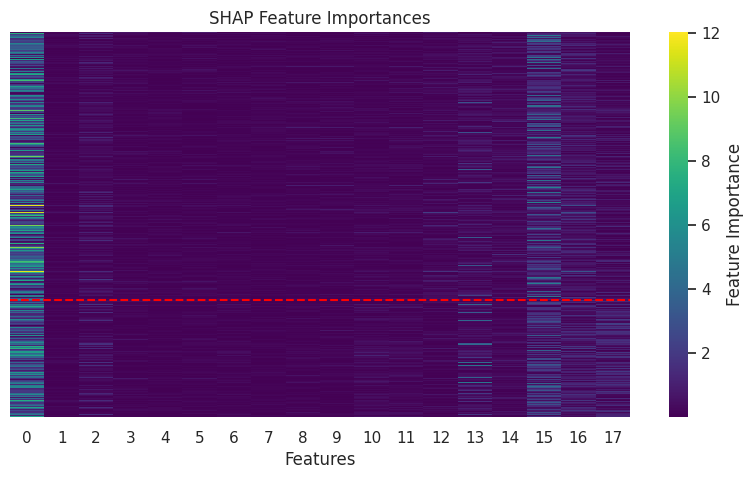

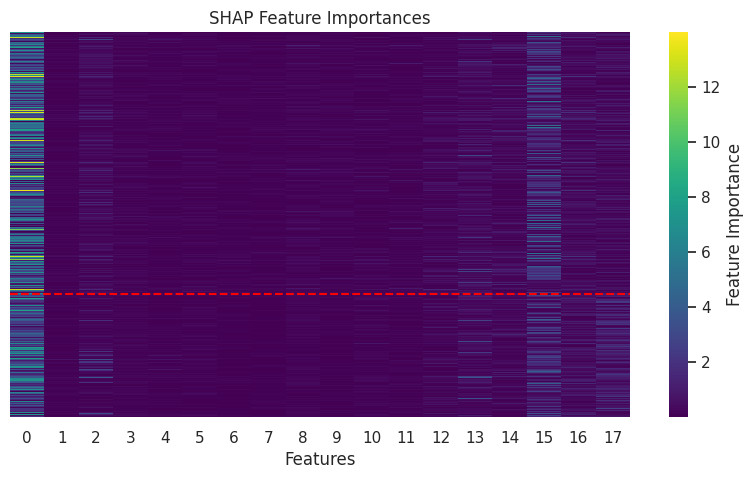

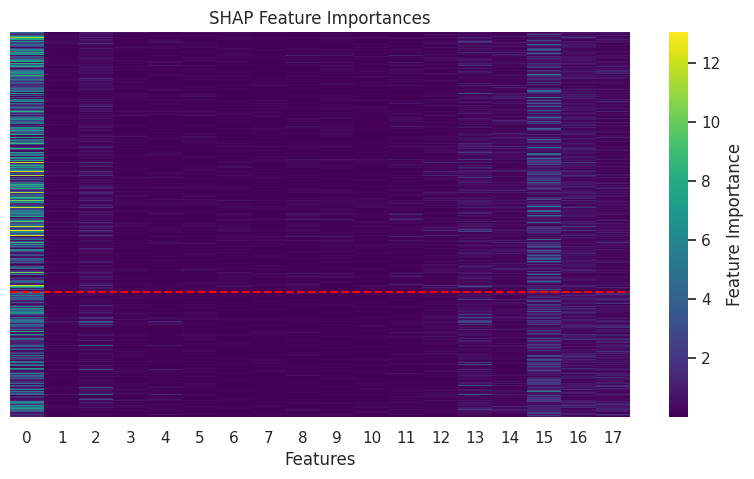

In [8]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(np.abs(shap_values[i]), cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("SHAP Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()

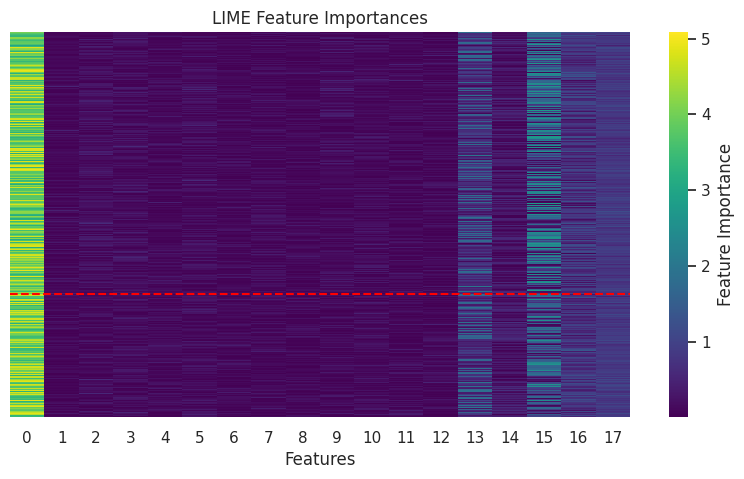

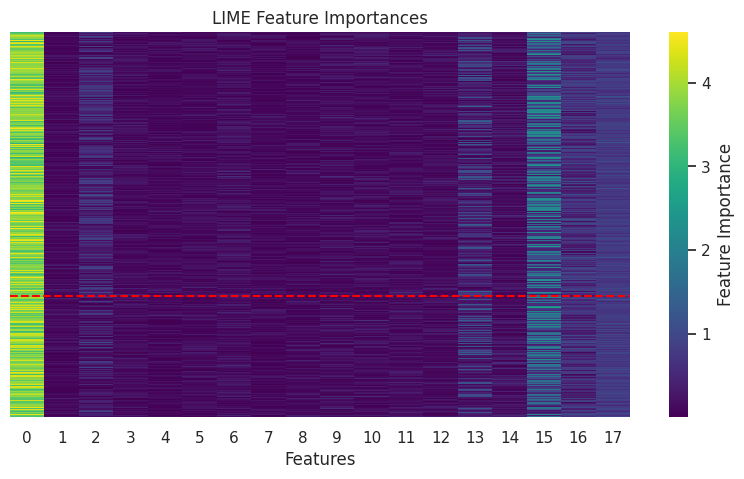

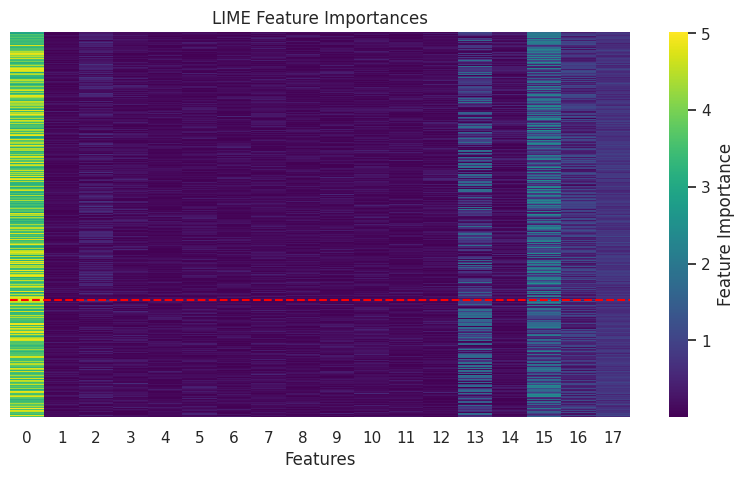

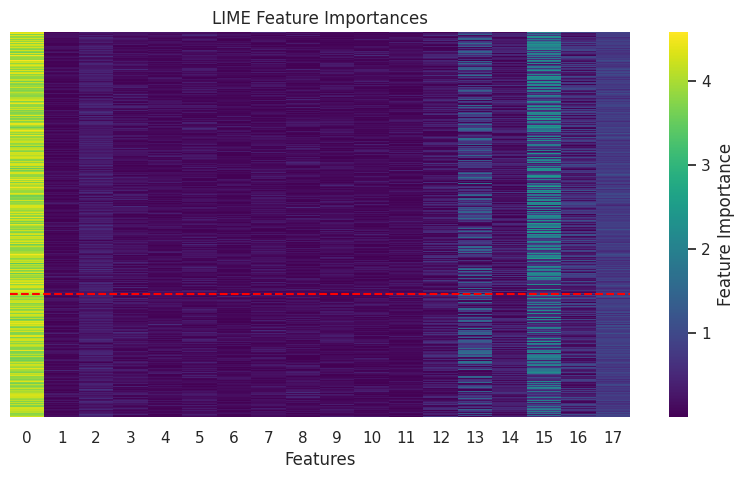

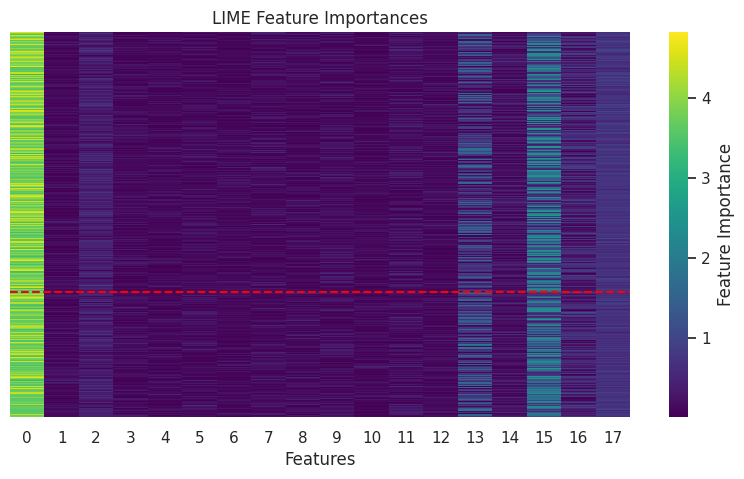

In [9]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(np.abs(lime_values[i]), cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LIME Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()

In [10]:
# read in feature importances
base_dir = "lfi-values/fulldata/rf/"
lotla_values = {}
shap_values = {}
lime_values = {}
women_count = {}
for seed in range(4):
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    sorted_idx = X_test['sex_1'].argsort()
    women_count[seed] = np.bincount(X_test['sex_1'])[0]
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons-nogender/elastic_nonnormed_nosquared_rank.csv", delimiter=",")[sorted_idx]
    shap_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons-nogender/shap.csv", delimiter=",")[sorted_idx]
    lime_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons-nogender/lime.csv", delimiter=",")[sorted_idx]

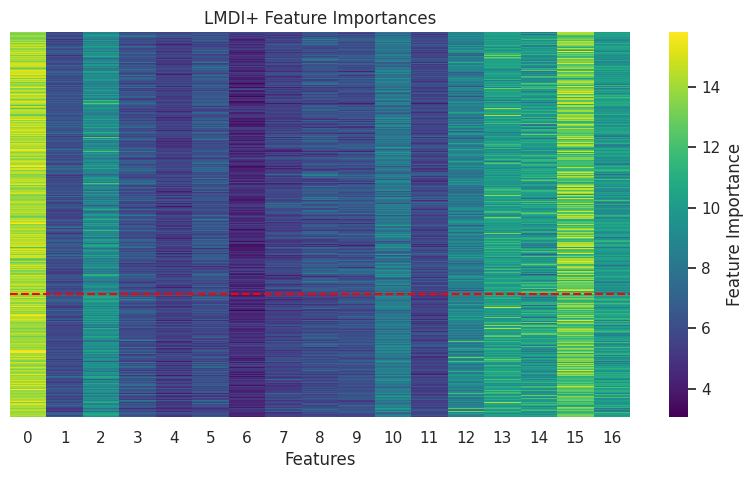

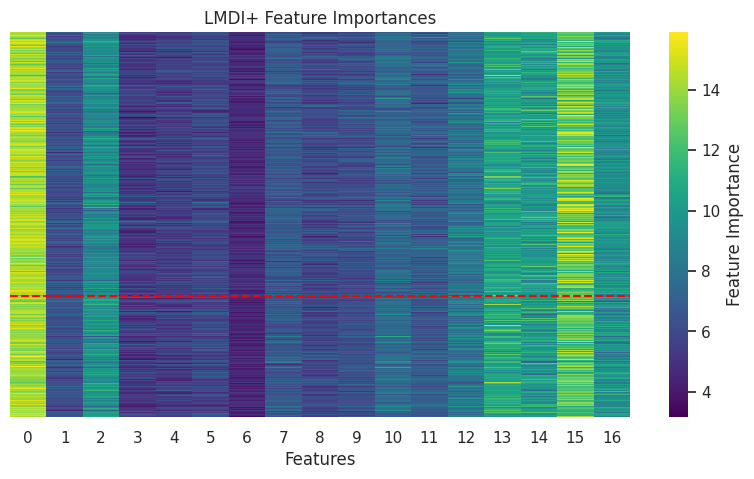

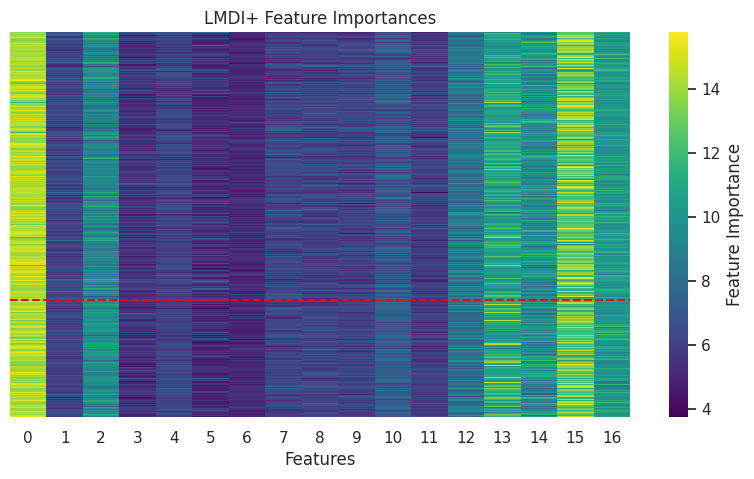

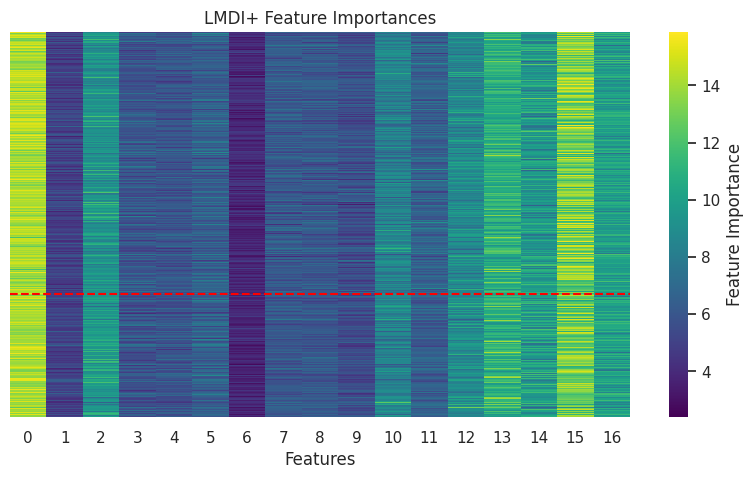

In [11]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(4):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(lotla_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LMDI+ Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()

In [43]:
feat2_imp_women = lotla_values[0][:, 2][X_test['sex_1']==0]
feat2_imp_men = lotla_values[0][:, 2][X_test['sex_1']==1]

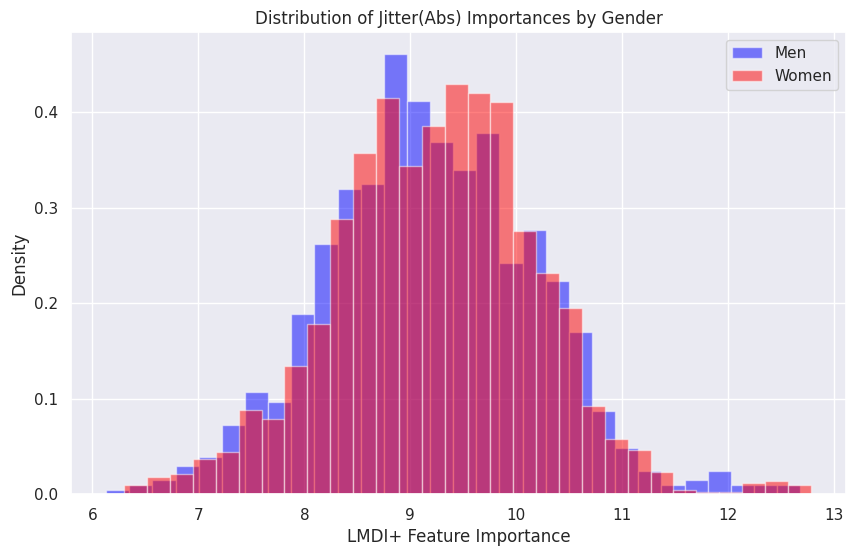

In [47]:
# plot histogram of dfa_imp_women and dfa_imp_men on top of each other
plt.figure(figsize=(10, 6))
plt.hist(feat2_imp_men, color='blue', density=True, bins=30, alpha=0.5, label="Men")
plt.hist(feat2_imp_women, color='red', density=True, bins=30, alpha=0.5, label="Women")
# make legend that says blue is men and red is women
plt.legend()
plt.xlabel("LMDI+ Feature Importance")
plt.ylabel("Density")
plt.title("Distribution of " + X.columns[2] + " Importances by Gender")
plt.show()

In [41]:
DFA_imp_women = lotla_values[0][:, 15][X_test['sex_1']==0]
DFA_imp_men = lotla_values[0][:, 15][X_test['sex_1']==1]

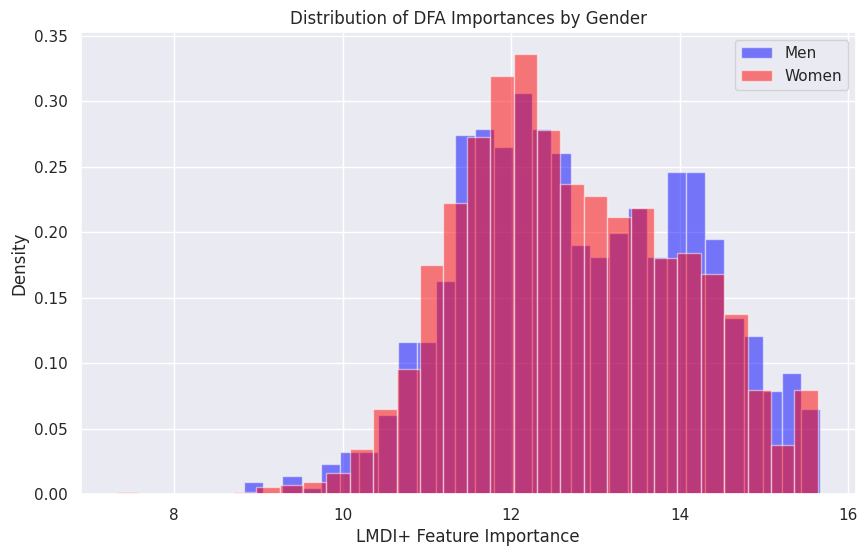

In [48]:
# plot histogram of dfa_imp_women and dfa_imp_men on top of each other
plt.figure(figsize=(10, 6))
plt.hist(DFA_imp_men, color='blue', density=True, bins=30, alpha=0.5, label="Men")
plt.hist(DFA_imp_women, color='red', density=True, bins=30, alpha=0.5, label="Women")
# make legend that says blue is men and red is women
plt.legend()
plt.xlabel("LMDI+ Feature Importance")
plt.ylabel("Density")
plt.title("Distribution of " + X.columns[15] + " Importances by Gender")
plt.show()

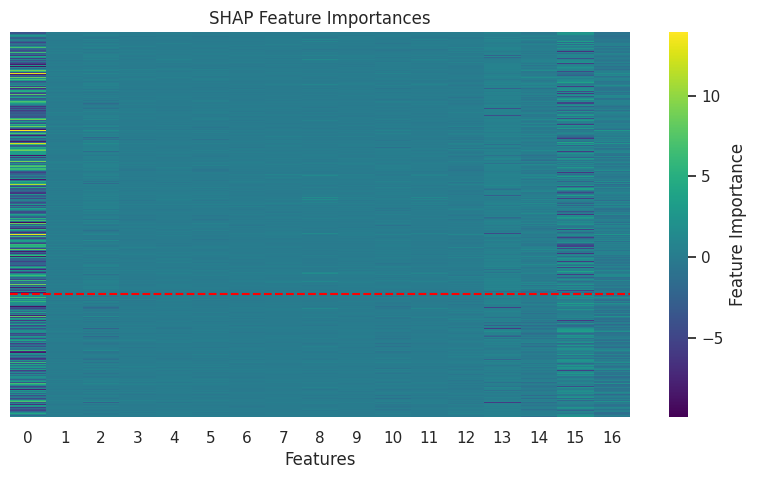

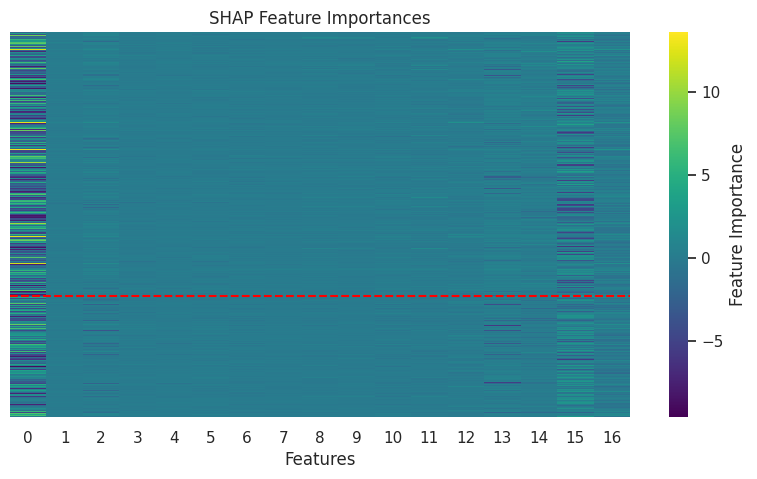

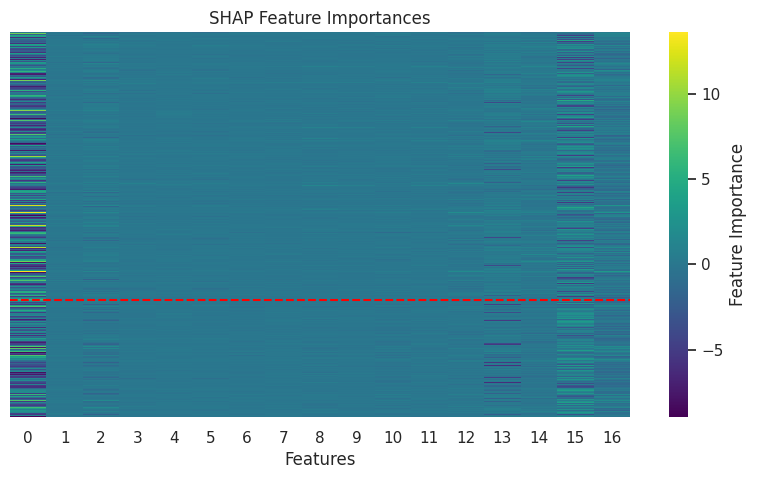

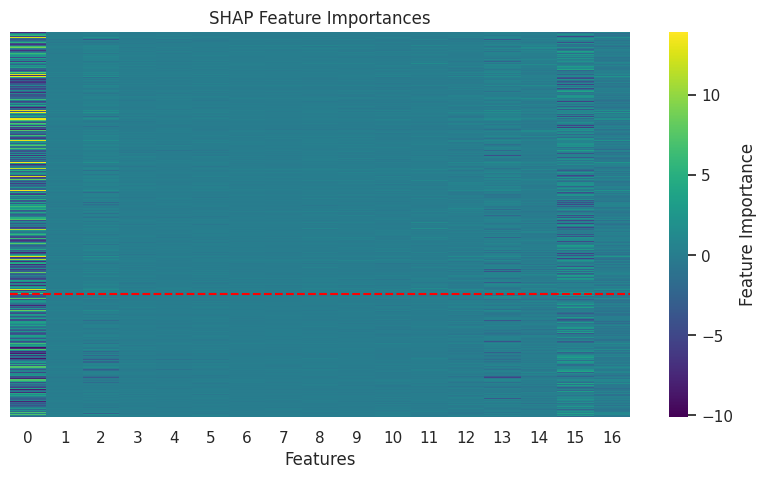

In [12]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(4):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(shap_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("SHAP Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()

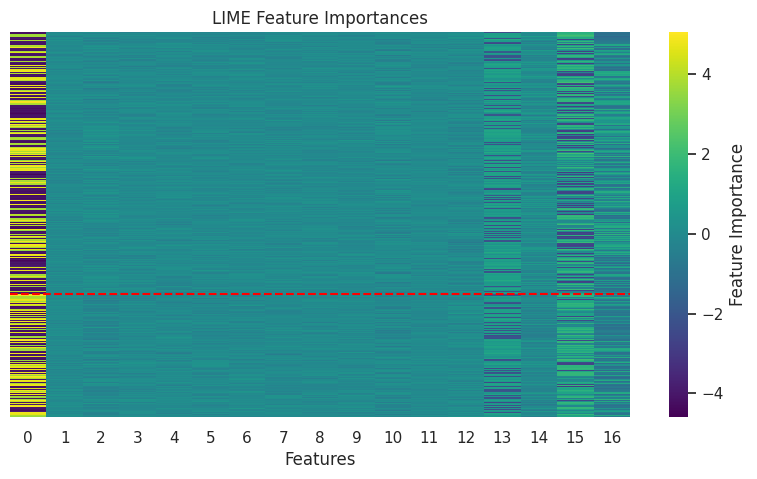

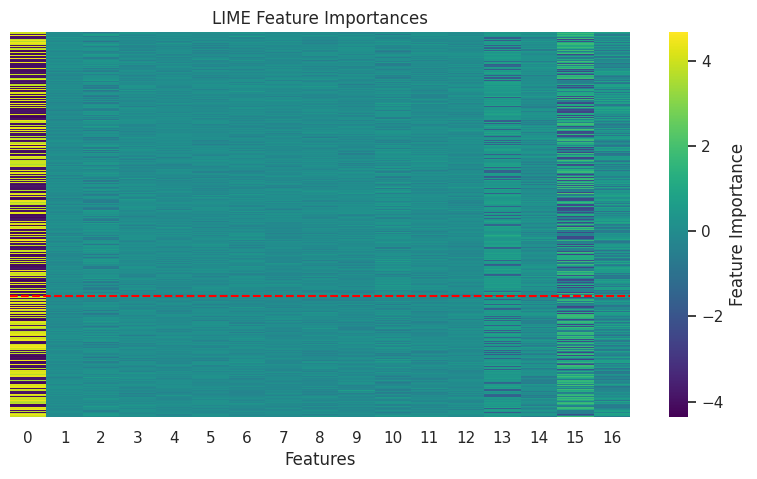

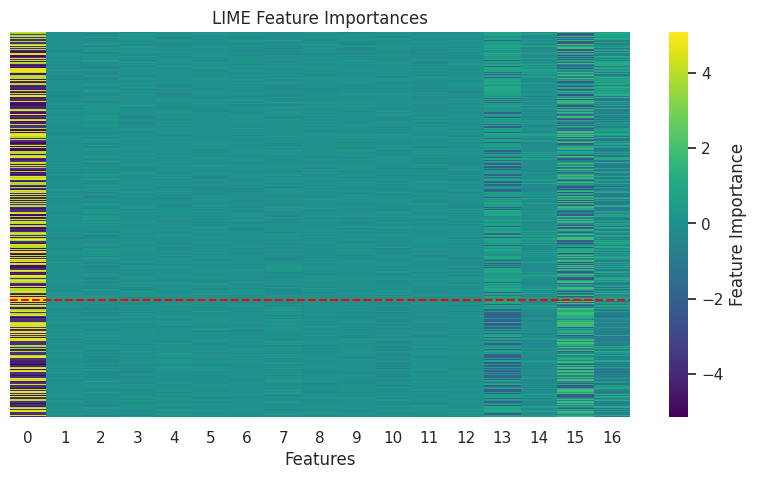

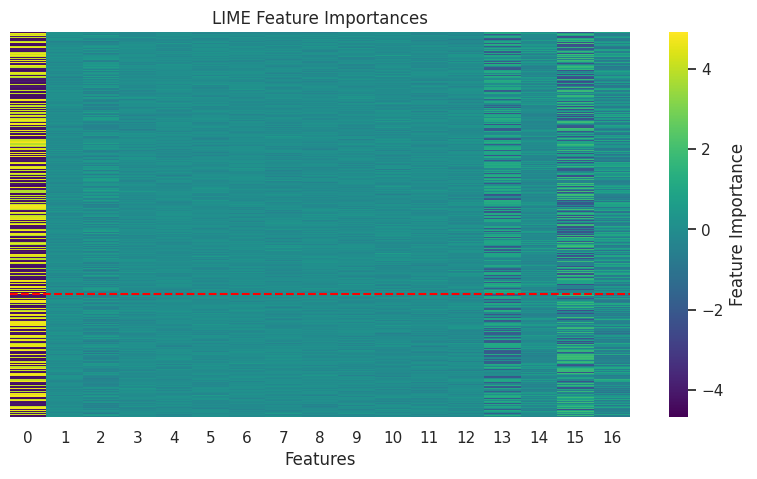

In [13]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(4):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(lime_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LIME Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()